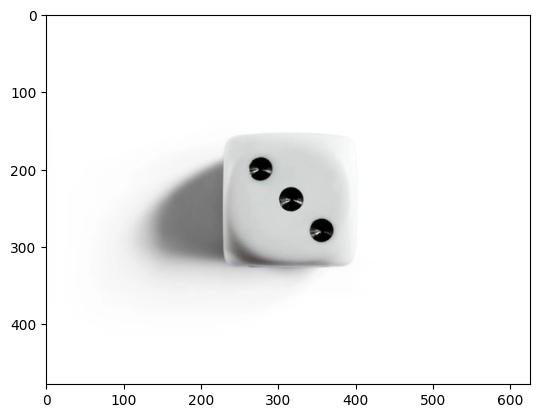

2


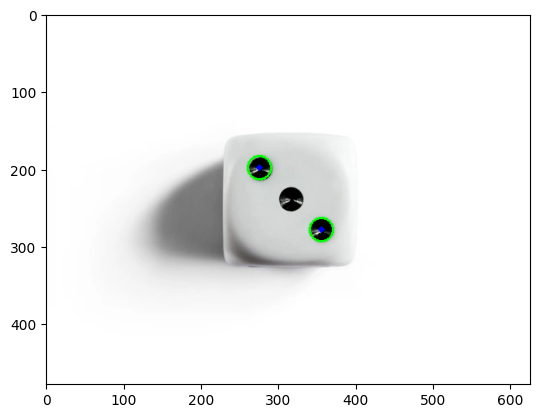

In [237]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('input/unknown2.png')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
detected_edges = cv2.Canny(gray_img,9, 150, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
close = cv2.morphologyEx(detected_edges, cv2.MORPH_CLOSE, kernel, iterations=2)
circles = cv2.HoughCircles(close,cv2.HOUGH_GRADIENT,1.1,20,param1=50,param2=30,minRadius=5,maxRadius=55)
# print(circles)
circles=circles[0,:]

for i in circles:
    cv2.circle(rgb_img,(int(i[0]),int(i[1])),int(i[2]),(0,255,0),2)
    cv2.circle(rgb_img,(int(i[0]),int(i[1])),2,(0,0,255),3)

print(len(circles))
plt.imshow(rgb_img)
plt.show()
# plt.imshow(close, cmap='gray')
# plt.imshow(gray_img, cmap='gray')

3
[[ 1 -1 -1 -1]
 [ 2  0 -1 -1]
 [-1  1 -1 -1]]


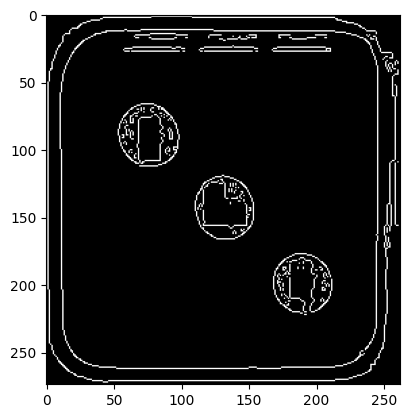

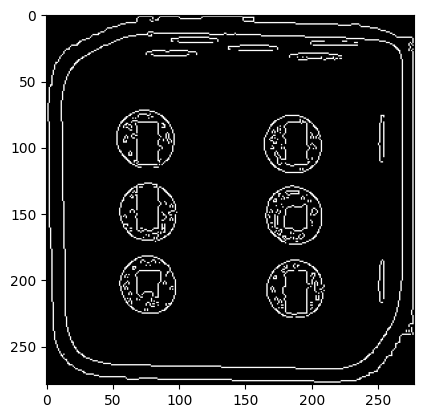

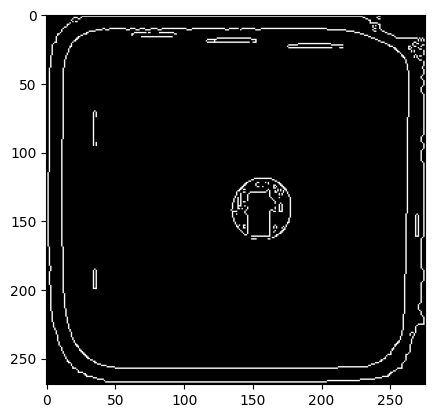

3 6 1


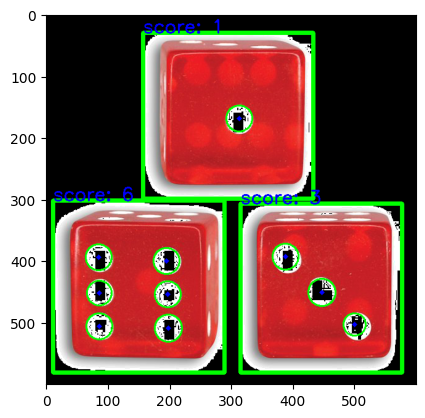

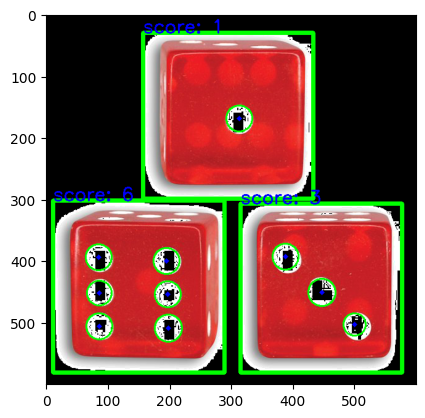

In [238]:
img = cv2.imread('input/unknown3.png')

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thresh = cv2.threshold(gray_img,220,255, cv2.THRESH_BINARY_INV)[1]
detected_edges = cv2.Canny(thresh,3, 150, 3)
circles = cv2.HoughCircles(detected_edges,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=25,minRadius=3,maxRadius=35)
circles=circles[0,:]
for i in circles:
    # draw the outer circle
    cv2.circle(rgb_img,(int(i[0]),int(i[1])),int(i[2]),(0,255,0),2)
    # draw the center of the circle
    cv2.circle(rgb_img,(int(i[0]),int(i[1])),2,(0,0,255),3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
dil = cv2.dilate(detected_edges,kernel,iterations = 1)

contours, hierarchy = cv2.findContours(dil, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
print((hierarchy[0]))

# since we have 3 dices and we want score of each one we need to split 'em into two image then recognise their scores.
x0, y0, w0, h0= cv2.boundingRect(contours[0])
cv2.rectangle(rgb_img, (x0,y0),(x0+w0,y0+h0), (0,255,0),5)

x1, y1, w1, h1= cv2.boundingRect(contours[1])
cv2.rectangle(rgb_img, (x1,y1),(x1+w1,y1+h1), (0,255,0),5)

x2, y2, w2, h2= cv2.boundingRect(contours[2])
cv2.rectangle(rgb_img, (x2,y2),(x2+w2,y2+h2), (0,255,0),5)
dice0 = detected_edges[y0:y0+h0, x0:x0+w0]
dice1 = detected_edges[y1:y1+h1, x1:x1+w1]
dice2 = detected_edges[y2:y2+h2, x2:x2+w2]

plt.imshow(dice0, cmap='gray')
plt.show()
plt.imshow(dice1, cmap='gray')
plt.show()
plt.imshow(dice2, cmap='gray')
plt.show()
circles0 = cv2.HoughCircles(dice0,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=25,minRadius=3,maxRadius=35)
circles1 = cv2.HoughCircles(dice1,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=25,minRadius=3,maxRadius=35)
circles2 = cv2.HoughCircles(dice2,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=25,minRadius=3,maxRadius=35)
print(len(circles0[0]), len(circles1[0]), len(circles2[0]))
cv2.putText(rgb_img, f'score: {len(circles0[0])}', (x0, y0), cv2.FONT_ITALIC , 1, (0,0,255), 2)
cv2.putText(rgb_img, f'score: {len(circles1[0])}', (x1, y1), cv2.FONT_ITALIC , 1, (0,0,255), 2)
cv2.putText(rgb_img, f'score: {len(circles2[0])}', (x2, y2), cv2.FONT_ITALIC , 1, (0,0,255), 2)
plt.imshow(rgb_img)
plt.show()
plt.imshow(rgb_img)
plt.imshow(rgb_img)
plt.show()

# print(circles)
# plt.imshow(detected_edges, cmap='gray')
# plt.show()
# plt.imshow(gray_img, cmap='gray')
# plt.show()
# plt.imshow(rgb_img)
# plt.show()

5
[[ 1 -1 -1 -1]
 [ 2  0 -1 -1]
 [ 3  1 -1 -1]
 [ 4  2 -1 -1]
 [-1  3 -1 -1]]


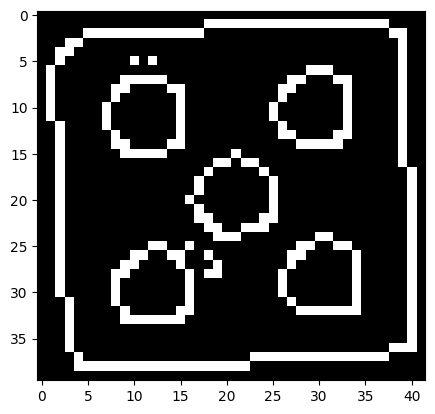

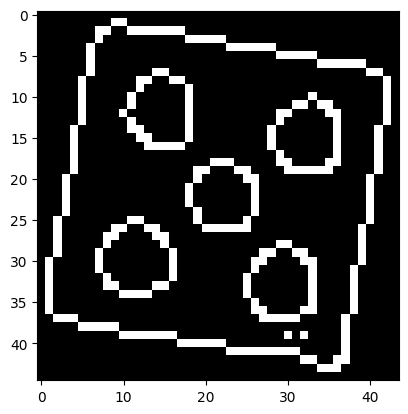

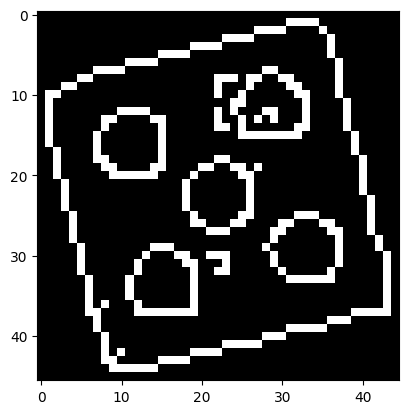

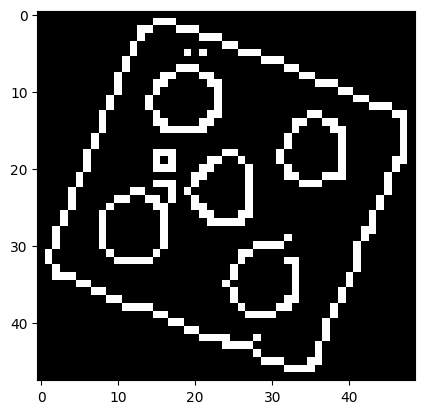

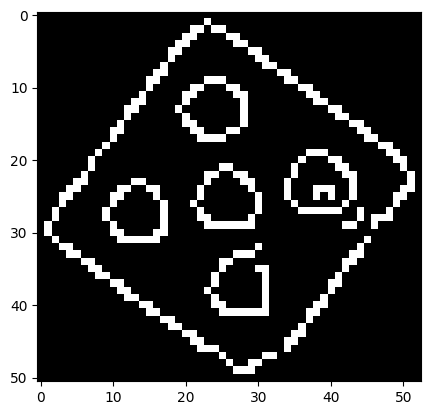

TypeError: 'NoneType' object is not subscriptable

In [239]:
img = cv2.imread('input/unknown4.png')

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thresh = cv2.threshold(gray_img,220,255, cv2.THRESH_BINARY_INV)[1]
detected_edges = cv2.Canny(thresh,3, 150, 3)
circles = cv2.HoughCircles(detected_edges,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=25,minRadius=3,maxRadius=35)
circles=circles[0,:]
for i in circles:
    # draw the outer circle
    cv2.circle(rgb_img,(int(i[0]),int(i[1])),int(i[2]),(0,255,0),2)
    # draw the center of the circle
    cv2.circle(rgb_img,(int(i[0]),int(i[1])),2,(0,0,255),3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
dil = cv2.dilate(detected_edges,kernel,iterations = 1)

contours, hierarchy = cv2.findContours(dil, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
print((hierarchy[0]))

# since we have 3 dices and we want score of each one we need to split 'em into two image then recognise their scores.
x0, y0, w0, h0= cv2.boundingRect(contours[0])
cv2.rectangle(rgb_img, (x0,y0),(x0+w0,y0+h0), (0,255,0),5)

x1, y1, w1, h1= cv2.boundingRect(contours[1])
cv2.rectangle(rgb_img, (x1,y1),(x1+w1,y1+h1), (0,255,0),5)

x2, y2, w2, h2= cv2.boundingRect(contours[2])
cv2.rectangle(rgb_img, (x2,y2),(x2+w2,y2+h2), (0,255,0),5)

x3, y3, w3, h3= cv2.boundingRect(contours[3])
cv2.rectangle(rgb_img, (x3,y3),(x3+w3,y3+h3), (0,255,0),5)

x4, y4, w4, h4= cv2.boundingRect(contours[4])
cv2.rectangle(rgb_img, (x4,y4),(x4+w4,y4+h4), (0,255,0),5)
dice0 = detected_edges[y0:y0+h0, x0:x0+w0]
dice1 = detected_edges[y1:y1+h1, x1:x1+w1]
dice2 = detected_edges[y2:y2+h2, x2:x2+w2]
dice3 = detected_edges[y3:y3+h3, x3:x3+w3]
dice4 = detected_edges[y4:y4+h4, x4:x4+w4]

plt.imshow(dice0, cmap='gray')
plt.show()
plt.imshow(dice1, cmap='gray')
plt.show()
plt.imshow(dice2, cmap='gray')
plt.show()
plt.imshow(dice3, cmap='gray')
plt.show()
plt.imshow(dice4, cmap='gray')
plt.show()
circles0 = cv2.HoughCircles(dice0,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=25,minRadius=3,maxRadius=35)
circles1 = cv2.HoughCircles(dice1,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=25,minRadius=3,maxRadius=35)
circles2 = cv2.HoughCircles(dice2,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=25,minRadius=3,maxRadius=35)
circles3 = cv2.HoughCircles(dice3,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=25,minRadius=3,maxRadius=35)
circles4 = cv2.HoughCircles(dice4,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=25,minRadius=3,maxRadius=35)

# print(len(circles0[0]), len(circles1[0]), len(circles2[0]))
# len(circles3[0]),len(circles4[0])
cv2.putText(rgb_img, f'score: {len(circles0[0])}', (x0, y0), cv2.FONT_ITALIC , 1, (0,0,255), 2)
cv2.putText(rgb_img, f'score: {len(circles1[0])}', (x1, y1), cv2.FONT_ITALIC , 1, (0,0,255), 2)
cv2.putText(rgb_img, f'score: {len(circles2[0])}', (x2, y2), cv2.FONT_ITALIC , 1, (0,0,255), 2)
cv2.putText(rgb_img, f'score: {len(circles3[0])}', (x3, y3), cv2.FONT_ITALIC , 1, (0,0,255), 2)
cv2.putText(rgb_img, f'score: {len(circles4[0])}', (x4, y4), cv2.FONT_ITALIC , 1, (0,0,255), 2)

plt.imshow(rgb_img)
plt.show()
# plt.imshow(rgb_img)
# plt.imshow(rgb_img)
# plt.show()

# print(circles)
# plt.imshow(detected_edges, cmap='gray')
# plt.show()
# plt.imshow(gray_img, cmap='gray')
# plt.show()
# plt.imshow(rgb_img)
# plt.show()